In [1]:
#Import dependancies
import os
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
from scipy.stats import linregress
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
#Covid data reading and column checking 
Covid_records = "Resources/IL_covid_data.csv"
Covid_recordsDF = pd.read_csv(Covid_records, encoding="utf-8")
Covid_recordsDF.columns

Index(['Date', 'Cases - Total', 'Deaths - Total', 'Hospitalizations - Total',
       'Cases - Age 0-17', 'Cases - Age 18-29', 'Cases - Age 30-39',
       'Cases - Age 40-49', 'Cases - Age 50-59', 'Cases - Age 60-69',
       'Cases - Age 70-79', 'Cases -  Age 80+', 'Cases - Age Unknown',
       'Cases - Female', 'Cases - Male', 'Cases - Unknown Gender',
       'Cases - Latinx', 'Cases - Asian Non-Latinx',
       'Cases - Black Non-Latinx', 'Cases - White Non-Latinx',
       'Cases - Other Race Non-Latinx', 'Cases - Unknown Race/Ethnicity',
       'Deaths - Age 0-17', 'Deaths - Age 18-29', 'Deaths - Age 30-39',
       'Deaths - Age 40-49', 'Deaths - Age 50-59', 'Deaths - Age 60-69',
       'Deaths - Age 70-79', 'Deaths - Age 80+', 'Deaths - Age Unknown',
       'Deaths - Female', 'Deaths - Male', 'Deaths - Unknown Gender',
       'Deaths - Latinx', 'Deaths - Asian Non-Latinx',
       'Deaths - Black Non-Latinx', 'Deaths - White Non-Latinx',
       'Deaths - Other Race Non-Latinx', 'Death

In [3]:
Covid_recordsDF.dtypes

Date                                          object
Cases - Total                                 object
Deaths - Total                                 int64
Hospitalizations - Total                      object
Cases - Age 0-17                               int64
Cases - Age 18-29                              int64
Cases - Age 30-39                              int64
Cases - Age 40-49                              int64
Cases - Age 50-59                              int64
Cases - Age 60-69                              int64
Cases - Age 70-79                              int64
Cases -  Age 80+                               int64
Cases - Age Unknown                            int64
Cases - Female                                object
Cases - Male                                  object
Cases - Unknown Gender                         int64
Cases - Latinx                                object
Cases - Asian Non-Latinx                       int64
Cases - Black Non-Latinx                      

In [4]:
# Filtered DF from specific columns
Covid_cols = ["Date", "Cases - Total"]
Covid_transformed= Covid_recordsDF[Covid_cols].copy()

#clean
print(Covid_transformed.shape)
Covid_transformed.drop_duplicates("Date", inplace=True) # method 1
Covid_transformed = Covid_transformed.dropna() # method 2
Covid_transformed.head()

(333, 2)


,Date,Cases - Total
0,3/1/2020,0
1,3/2/2020,0
2,3/3/2020,0
3,3/4/2020,0
4,3/5/2020,1


In [5]:
#Datetime for Covid
Covid_transformed['Date'] = pd.to_datetime(Covid_transformed['Date'], format="%m/%d/%Y")
Covid_transformed.dtypes

Date             datetime64[ns]
Cases - Total            object
dtype: object

In [6]:
Covid_transformed['Cases - Total'] = Covid_transformed['Cases - Total'].str.replace(",", "")

In [7]:
Covid_transformed['Cases - Total'] = Covid_transformed['Cases - Total'].astype('int')

In [8]:
#Crime data reading and column checking 
Crime_datadf = "Resources/Chi_crime_data.csv"
Crime_datadf = pd.read_csv(Crime_datadf, encoding="utf-8")
Crime_datadf.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [9]:
Crime_datadf.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JD164115,02/25/2020 10:20:00 AM,013XX S CANAL ST,0460,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,1173336.0,1893976.0,41.864494,-87.639158,"(41.864493678, -87.639158)"
1,JD163938,02/25/2020 05:30:00 AM,033XX W CULLOM AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)"
2,JC164345,02/25/2020 01:04:00 PM,023XX S PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,1150083.0,1887962.0,41.848475,-87.724676,"(41.848474762, -87.724676285)"
3,JD164701,02/25/2020 06:05:00 PM,058XX N RIDGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,1165471.0,1938819.0,41.987716,-87.666750,"(41.987716355, -87.666750459)"
4,JD164416,02/25/2020 01:42:00 PM,011XX N HARDING AVE,2027,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,1149847.0,1907230.0,41.901353,-87.725041,"(41.901352928, -87.725041269)"


In [10]:
#fixing dates and merging DFs
Crime_datadf['DATE  OF OCCURRENCE'] = pd.to_datetime(Crime_datadf['DATE  OF OCCURRENCE'], format="%m/%d/%Y %I:%M:%S %p")
Crime_datadf.dtypes

CASE#                             object
DATE  OF OCCURRENCE       datetime64[ns]
BLOCK                             object
 IUCR                             object
 PRIMARY DESCRIPTION              object
 SECONDARY DESCRIPTION            object
 LOCATION DESCRIPTION             object
ARREST                            object
DOMESTIC                          object
BEAT                               int64
WARD                             float64
FBI CD                            object
X COORDINATE                     float64
Y COORDINATE                     float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
dtype: object

In [11]:
Crime_datadf['DATE  OF OCCURRENCE - DAY'] = Crime_datadf['DATE  OF OCCURRENCE'].dt.date

In [12]:
# Crime_datadf['DATE  OF OCCURRENCE'] = Crime_datadf['DATE  OF OCCURRENCE'].apply(lambda x: x.replace(hour=0, minute=0, second=0))

In [13]:
Crime_datadf.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'DATE  OF OCCURRENCE - DAY'],
      dtype='object')

In [14]:
Crime_datadf.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,DATE OF OCCURRENCE - DAY
0,JD164115,2020-02-25 10:20:00,013XX S CANAL ST,0460,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N,124,11.0,08B,1173336.0,1893976.0,41.864494,-87.639158,"(41.864493678, -87.639158)",2020-02-25
1,JD163938,2020-02-25 05:30:00,033XX W CULLOM AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,1724,33.0,06,1153387.0,1928387.0,41.959340,-87.711475,"(41.959339811, -87.711474784)",2020-02-25
2,JC164345,2020-02-25 13:04:00,023XX S PULASKI RD,1330,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N,1013,22.0,26,1150083.0,1887962.0,41.848475,-87.724676,"(41.848474762, -87.724676285)",2020-02-25
3,JD164701,2020-02-25 18:05:00,058XX N RIDGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y,2013,48.0,08B,1165471.0,1938819.0,41.987716,-87.666750,"(41.987716355, -87.666750459)",2020-02-25
4,JD164416,2020-02-25 13:42:00,011XX N HARDING AVE,2027,NARCOTICS,POSS: CRACK,STREET,Y,N,1112,37.0,18,1149847.0,1907230.0,41.901353,-87.725041,"(41.901352928, -87.725041269)",2020-02-25


In [15]:
#Clean that Data 
Crime_cols = ["CASE#", " IUCR", "DATE  OF OCCURRENCE - DAY", " PRIMARY DESCRIPTION", " SECONDARY DESCRIPTION", " LOCATION DESCRIPTION", "ARREST", "DOMESTIC"]
Crime_transformed = Crime_datadf[Crime_cols].copy()
print(Crime_transformed.shape)
Crime_transformed.drop_duplicates("CASE#", inplace=True)
print(Crime_transformed.shape)
Crime_transformed.dropna(inplace=True)
print(Crime_transformed.shape)
Crime_transformed.rename(columns={"DATE  OF OCCURRENCE - DAY": "Date"}, inplace=True)
Crime_transformed['Date'] = pd.to_datetime(Crime_transformed['Date'], format='%Y-%m-%d')
Crime_transformed.head()

(205923, 8)
(205894, 8)
(204805, 8)


,CASE#,IUCR,Date,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC
0,JD164115,0460,2020-02-25,BATTERY,SIMPLE,GROCERY FOOD STORE,Y,N
1,JD163938,0820,2020-02-25,THEFT,$500 AND UNDER,STREET,N,N
2,JC164345,1330,2020-02-25,CRIMINAL TRESPASS,TO LAND,RESTAURANT,Y,N
3,JD164701,0486,2020-02-25,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,Y,Y
4,JD164416,2027,2020-02-25,NARCOTICS,POSS: CRACK,STREET,Y,N


In [16]:
#Merge to a single df
combined_data_df = pd.merge(Covid_transformed, Crime_transformed, on='Date')

In [17]:
print(combined_data_df.shape)
combined_data_df.head()

(180413, 9)


,Date,Cases - Total,CASE#,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC
0,2020-03-01,0,JD170468,0110,HOMICIDE,FIRST DEGREE MURDER,VESTIBULE,Y,N
1,2020-03-01,0,JD368864,0890,THEFT,FROM BUILDING,OTHER (SPECIFY),N,N
2,2020-03-01,0,JD170475,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,Y,Y
3,2020-03-01,0,JD191229,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,N,N
4,2020-03-01,0,JD170171,2027,NARCOTICS,POSSESS - CRACK,APARTMENT,Y,N


Text(0, 0.5, '# of Cases')

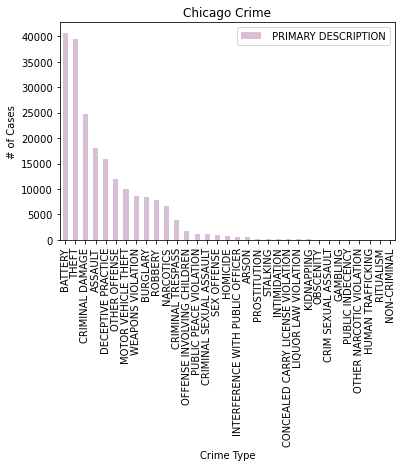

In [18]:
#First Quesyion Bar plot - Most committed crime type
crime_type_df = pd.DataFrame(Crime_transformed[" PRIMARY DESCRIPTION"].value_counts())
first_question_plot = crime_type_df.plot(kind="bar", title=("Chicago Crime"), color='thistle')
first_question_plot.set_xlabel('Crime Type')
first_question_plot.set_ylabel('# of Cases')

In [19]:
#Counts of crime per day
total_crime_df = Crime_transformed.value_counts(["Date"]).reset_index(name='Counts')

In [20]:
#Print out counts to csv
total_crime_df.to_csv('file_name.csv', index=False)

In [21]:
total_crime_df.sort_values('Date', inplace=True)

In [22]:
#Merge daily crime counts with covid counts
total_crime_with_covid_df = pd.merge(total_crime_df, Covid_transformed, on = "Date")

In [23]:
#Sort by date
total_crime_with_covid_df.sort_values('Date', inplace=True)
total_crime_with_covid_df = total_crime_with_covid_df.reset_index(drop=True)

In [24]:
total_crime_with_covid_df

,Date,Counts,Cases - Total
0,2020-03-01,706,0
1,2020-03-02,592,0
2,2020-03-03,630,0
3,2020-03-04,619,0
4,2020-03-05,583,1
...,...,...,...
321,2021-01-16,466,582
322,2021-01-17,460,365
323,2021-01-18,441,619
324,2021-01-19,471,1004


AttributeError: 'AxesSubplot' object has no attribute 'ylim'

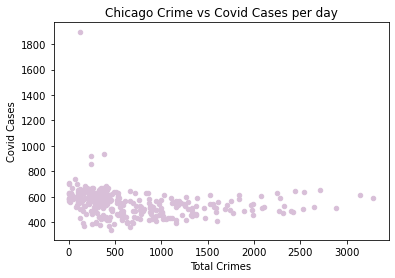

In [25]:
#Scatter plot correlation of covid and crime cases
total_crime_with_covid_plot = total_crime_with_covid_df.plot(kind='scatter', title=("Chicago Crime vs Covid Cases per day"), x='Cases - Total',y='Counts',color='thistle')
total_crime_with_covid_plot.set_xlabel('Total Crimes')
total_crime_with_covid_plot.set_ylabel('Covid Cases')
total_crime_with_covid_plot.ylim([350, 1000])

In [ ]:
#Describe the data set so we can see if there are any outliers.
total_crime_with_covid_df.describe()

In [ ]:
total_crime_type_df = Crime_transformed.value_counts([" PRIMARY DESCRIPTION", "Date"]).reset_index(name='Counts')
total_crime_type_df

In [ ]:
total_crime_type_df.sort_values(['Date', " PRIMARY DESCRIPTION"], inplace=True)
total_crime_type_df.to_csv('crime_type.csv', index=False)
total_crime_type_df

In [ ]:
total_crime_type_with_covid_df = pd.merge(total_crime_type_df, Covid_transformed, on = "Date")
total_crime_type_with_covid_df

In [ ]:
total_crime_type_with_covid_df.sort_values(['Date', " PRIMARY DESCRIPTION"], inplace=True)
total_crime_type_with_covid_df.to_csv('crime_type_with_covid.csv')

In [ ]:
total_crime_with_covid_df.describe()

In [ ]:
total_domestic_df = Crime_transformed[~(Crime_transformed['DOMESTIC'] == 'N')]

In [ ]:
total_domestic_df = total_domestic_df.value_counts(["DOMESTIC", 'Date']).reset_index(name='Counts')

In [ ]:
total_domestic_df.sort_values('Date', inplace=True)

In [ ]:
total_domestic_df

In [ ]:
total_domestic_with_covid_df = pd.merge(total_domestic_df, Covid_transformed, on = "Date")

In [ ]:
total_domestic_with_covid_df.sort_values('Date', inplace=True)
total_domestic_with_covid_df = total_domestic_with_covid_df.reset_index(drop=True)

In [ ]:
#total_domestic_with_covid_df.to_csv('domestic_with_covid.csv')

In [ ]:
total_domestic_with_covid_df.describe()

In [ ]:
total_domestic_with_covid_df

In [ ]:
total_domestic_with_covid_df.plot(kind='scatter',x='Cases - Total',y='Counts',color='red')

In [ ]:
#Plotly with Covid
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=Covid_transformed.Date, y=Covid_transformed['Cases - Total'], name="Covid data"), secondary_y=False)
fig.add_trace(go.Scatter(x=total_crime_df.Date, y=total_crime_df.Counts, name="Crime data"), secondary_y=True)
fig.update_layout(title_text="Covid & Crime cases with range slider and selectors")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.update_yaxes(title_text="<b>Covid", secondary_y=False)
fig.update_yaxes(title_text="<b>Crime", secondary_y=True)

fig.show()